In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'Desktop\Devops\ushape.csv')

In [7]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


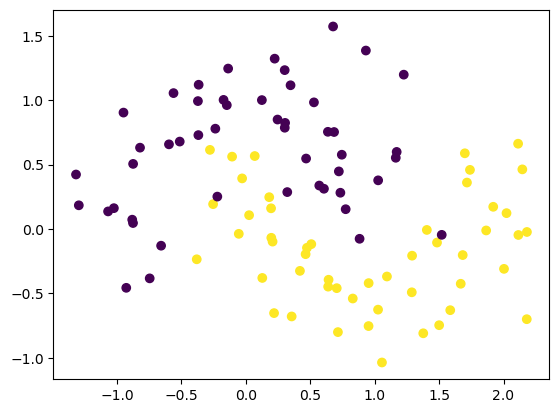

In [8]:
plt.scatter(df['3.159499363321345566e-02'],df['9.869877579082642072e-01'], c=df['0.000000000000000000e+00'])

In [9]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

C:\Users\jroun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.get_weights()

[array([[ 0.53112364, -0.7314868 ,  0.0597899 ],
        [ 0.34912133, -0.32265365,  0.5533464 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.95266354],
        [-0.80853206],
        [ 0.08599985]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
initial_weights= model.get_weights()

In [18]:
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
histroy = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5203 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4914 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4993 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5227 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss:

In [23]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.01156024], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 751us/step


<Axes: >

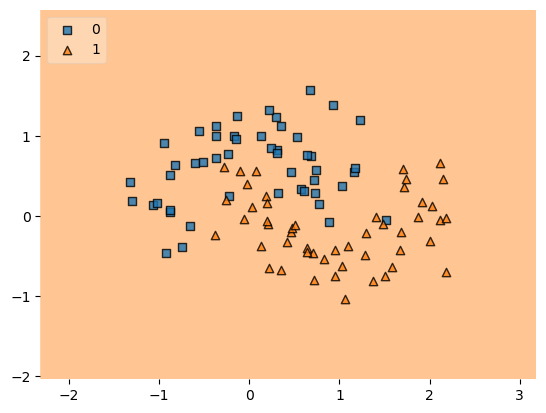

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [26]:
model = Sequential()

model.add(Dense(3, activation='tanh', input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

C:\Users\jroun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.get_weights()

[array([[-0.13329822,  0.17500103,  0.29495633],
        [ 0.37343562, -0.03203118,  0.1046685 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 1.0675231],
        [ 1.2201997],
        [-0.5438907]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
initial_weights= model.get_weights()

In [30]:
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [31]:
model.set_weights(initial_weights)

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
histroy = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4544 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5188 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5383 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5344 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss:

In [34]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.01769072], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 794us/step


<Axes: >

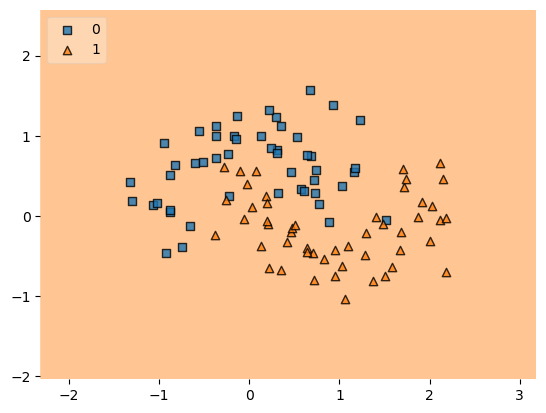

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [36]:
model_1 = Sequential()

model_1.add(Dense(3, activation='sigmoid', input_dim=2))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_2 = Sequential()

model_2.add(Dense(3, activation='sigmoid', input_dim=2))
model_2.add(Dense(1,activation='sigmoid'))
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model_1.get_weights()

[array([[ 0.21638727,  0.309381  ,  0.0664295 ],
        [-0.5674256 , -0.0220418 , -0.51491594]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.06208658],
        [-1.078923  ],
        [ 0.33456385]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
model_2.get_weights()

[array([[ 0.4909022 , -0.96628183,  0.96075845],
        [ 0.6594831 ,  0.44731092, -0.30481154]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.9001359],
        [-0.9823144],
        [-0.4618507]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
initial_weights= model_1.get_weights()
initial_weights= model_2.get_weights()

In [42]:
initial_weights[0]=np.zeros(model_1.get_weights()[0].shape)
initial_weights[1]=np.zeros(model_1.get_weights()[1].shape)
initial_weights[2]=np.zeros(model_1.get_weights()[2].shape)
initial_weights[3]=np.zeros(model_1.get_weights()[3].shape)

In [46]:
model_1.set_weights(initial_weights)

In [47]:
initial_weights[0]=np.zeros(model_2.get_weights()[0].shape)
initial_weights[1]=np.zeros(model_2.get_weights()[1].shape)
initial_weights[2]=np.zeros(model_2.get_weights()[2].shape)
initial_weights[3]=np.zeros(model_2.get_weights()[3].shape)

In [48]:
model_2.set_weights(initial_weights)

In [49]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
histroy = model_1.fit(X,y, epochs=100, validation_split=0.2)
histroy = model_2.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4788 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5461 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4836 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5227 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss:

In [51]:
model_1.get_weights()

[array([[ 0.43939874,  0.43939874,  0.43939874],
        [-0.47599927, -0.47599927, -0.47599927]], dtype=float32),
 array([-0.07111308, -0.07111308, -0.07111308], dtype=float32),
 array([[0.09456531],
        [0.09456531],
        [0.09456531]], dtype=float32),
 array([-0.02428971], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 822us/step


<Axes: >

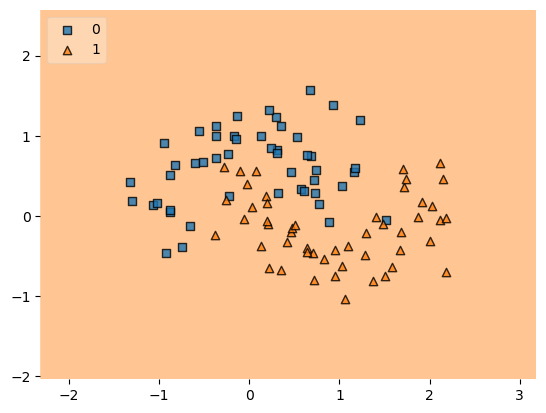

In [54]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model_1, legend=2)

In [53]:
model_2.get_weights()

[array([[ 0.45578542,  0.45578542,  0.45578542],
        [-0.48850226, -0.48850226, -0.48850226]], dtype=float32),
 array([-0.07375838, -0.07375838, -0.07375838], dtype=float32),
 array([[0.08494523],
        [0.08494523],
        [0.08494523]], dtype=float32),
 array([-0.01933439], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 787us/step


<Axes: >

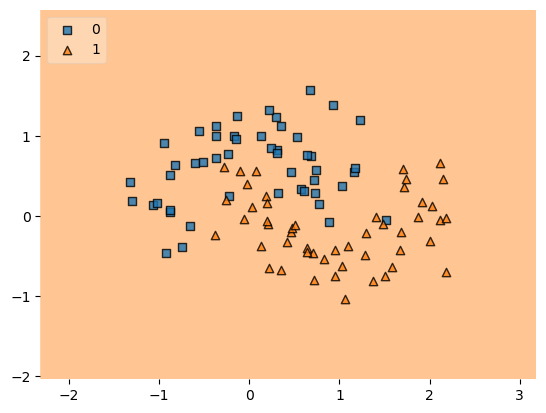

In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model_2, legend=2)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4993 - loss: 1.1037 - val_accuracy: 0.5000 - val_loss: 0.9120
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5110 - loss: 1.0689 - val_accuracy: 0.5000 - val_loss: 0.9073
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5227 - loss: 1.0351 - val_accuracy: 0.5000 - val_loss: 0.9028
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5422 - loss: 0.9977 - val_accuracy: 0.5000 - val_loss: 0.8984
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4602 - loss: 1.1443 - val_accuracy: 0.5000 - val_loss: 0.8940
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5305 - loss: 0.9972 - val_accuracy: 0.5000 - val_loss: 0.8898
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5188 - loss: 1.0222 - val_accuracy: 0.5000 - val_loss: 0.8855
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4875 - loss: 1.0656 - val_accuracy: 0.5000 - val_loss

<Axes: >

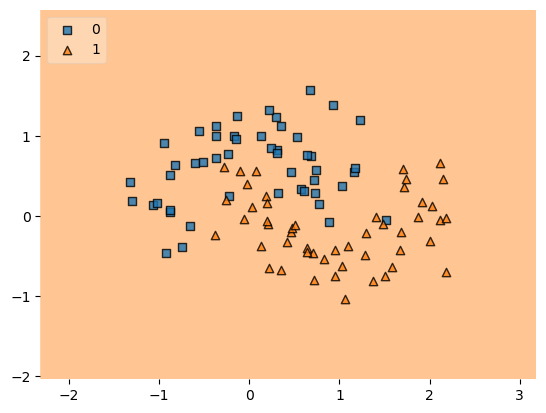

In [66]:
model_1_1 = Sequential()

model_1_1.add(Dense(3, activation='relu', input_dim=2))
model_1_1.add(Dense(1,activation='sigmoid'))
model_1_1.summary()
model_1_1.get_weights()
initial_weights= model_1_1.get_weights()
initial_weights[0]=np.ones(model_1_1.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model_1_1.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model_1_1.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model_1_1.get_weights()[3].shape)*0.5
model_1_1.set_weights(initial_weights)
model_1_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
histroy = model_1_1.fit(X,y, epochs=100, validation_split=0.2)
model_1_1.get_weights()
plot_decision_regions(X,y.astype('int'), clf=model_1_1, legend=2)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5344 - loss: 0.9052 - val_accuracy: 0.5000 - val_loss: 0.8285
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5110 - loss: 0.9247 - val_accuracy: 0.5000 - val_loss: 0.8247
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5266 - loss: 0.8959 - val_accuracy: 0.5000 - val_loss: 0.8210
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5305 - loss: 0.9181 - val_accuracy: 0.5000 - val_loss: 0.8174
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5110 - loss: 0.9140 - val_accuracy: 0.5000 - val_loss: 0.8137
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4836 - loss: 0.9539 - val_accuracy: 0.5000 - val_loss: 0.8102
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4875 - loss: 0.9539 - val_accuracy: 0.5000 - val_loss: 0.8067
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5071 - loss: 0.9052 - val_accuracy: 0.5000 - val_loss:

<Axes: >

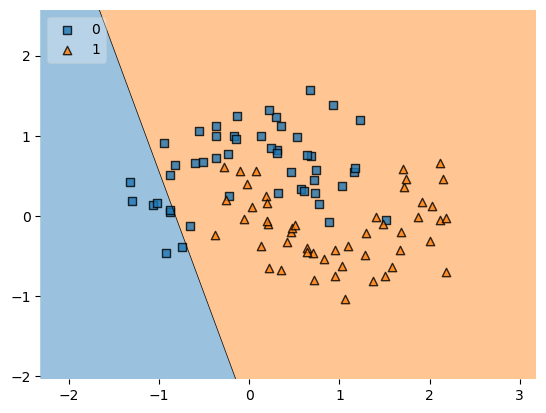

In [65]:
model_1_2 = Sequential()

model_1_2.add(Dense(3, activation='tanh', input_dim=2))
model_1_2.add(Dense(1,activation='sigmoid'))
model_1_2.summary()
model_1_2.get_weights()
initial_weights= model_1_2.get_weights()
initial_weights[0]=np.ones(model_1_2.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model_1_2.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model_1_2.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model_1_2.get_weights()[3].shape)*0.5
model_1_2.set_weights(initial_weights)
model_1_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
histroy = model_1_2.fit(X,y, epochs=100, validation_split=0.2)
model_1_2.get_weights()
plot_decision_regions(X,y.astype('int'), clf=model_1_2, legend=2)


In [67]:
model_1_1.get_weights()


[array([[0.44303104, 0.44303104, 0.44303104],
        [0.2566546 , 0.2566546 , 0.2566546 ]], dtype=float32),
 array([0.29776445, 0.29776445, 0.29776445], dtype=float32),
 array([[0.28614134],
        [0.28614134],
        [0.28614134]], dtype=float32),
 array([0.2522598], dtype=float32)]

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5086 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4890 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5281 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4890 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5046 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4812 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4773 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

<Axes: >

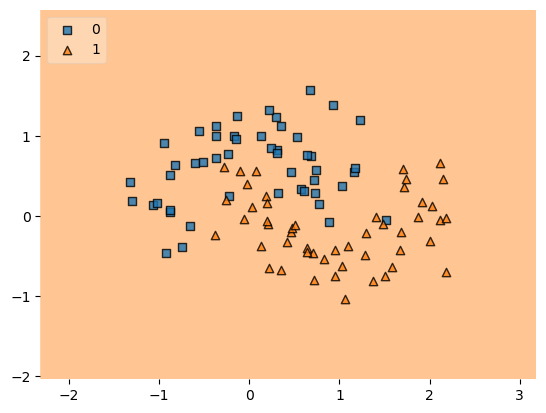

In [68]:
model1 =Sequential()

model1.add(Dense(2,activation='tanh', input_dim=2))
model1.add(Dense(2,activation='tanh'))
model1.add(Dense(2,activation='tanh'))
model1.add(Dense(2,activation='tanh'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
model1.get_weights()
initial_weights= model1.get_weights()
initial_weights[0]=np.random.randn(model1.get_weights()[0].shape[0],model1.get_weights()[0].shape[1])*0.01
initial_weights[1]=np.zeros(model1.get_weights()[1].shape)
initial_weights[2]=np.random.randn(model1.get_weights()[2].shape[0],model1.get_weights()[2].shape[1])*0.01
initial_weights[3]=np.zeros(model1.get_weights()[3].shape)
initial_weights[4]=np.random.randn(model1.get_weights()[4].shape[0],model1.get_weights()[4].shape[1])*0.01
initial_weights[5]=np.zeros(model1.get_weights()[5].shape)
initial_weights[6]=np.random.randn(model1.get_weights()[6].shape[0],model1.get_weights()[6].shape[1])*0.01
initial_weights[7]=np.zeros(model1.get_weights()[7].shape)
initial_weights[8]=np.random.randn(model1.get_weights()[8].shape[0],model1.get_weights()[8].shape[1])*0.01
initial_weights[9]=np.zeros(model1.get_weights()[9].shape)
model1.set_weights(initial_weights)
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
histroy = model1.fit(X,y, epochs=100, validation_split=0.2)
model1.get_weights()
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)


In [69]:
model1.get_weights()

[array([[ 0.17677118,  0.22503205],
        [-0.15941025, -0.22897677]], dtype=float32),
 array([ 0.00085806, -0.00392141], dtype=float32),
 array([[-0.16669653,  0.17517732],
        [-0.20374812,  0.24869186]], dtype=float32),
 array([-0.00779624,  0.0094003 ], dtype=float32),
 array([[ 0.19048253, -0.18231858],
        [-0.21134275,  0.22429197]], dtype=float32),
 array([-0.01227179,  0.01511096], dtype=float32),
 array([[-0.1094951 , -0.11559434],
        [ 0.09099638,  0.10586278]], dtype=float32),
 array([0.01179849, 0.01460536], dtype=float32),
 array([[0.03487703],
        [0.04248294]], dtype=float32),
 array([0.01593476], dtype=float32)]

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.5007 - loss: 0.9127 - val_accuracy: 0.3000 - val_loss: 1.1334
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5203 - loss: 0.8684 - val_accuracy: 0.3000 - val_loss: 1.1248
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5007 - loss: 0.8986 - val_accuracy: 0.3000 - val_loss: 1.1159
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5046 - loss: 0.8755 - val_accuracy: 0.3000 - val_loss: 1.1067
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4914 - loss: 0.8852 - val_accuracy: 0.3000 - val_loss: 1.0971
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4563 - loss: 0.9230 - val_accuracy: 0.3000 - val_loss: 1.0874
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5007 - loss: 0.8593 - val_accuracy: 0.3000 - val_loss: 1.0779
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4875 - loss: 0.8671 - val_accuracy: 0.3000 - val_loss

<Axes: >

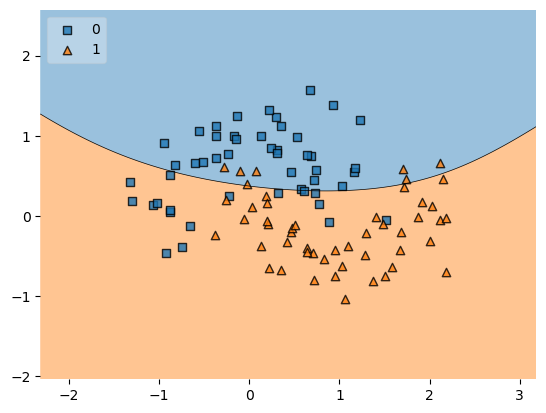

In [72]:
model2 =Sequential()

model2.add(Dense(2,activation='tanh', input_dim=2))
model2.add(Dense(2,activation='tanh'))
model2.add(Dense(2,activation='tanh'))
model2.add(Dense(2,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()
model2.get_weights()
initial_weights= model2.get_weights()
initial_weights[0]=np.random.randn(model2.get_weights()[0].shape[0],model2.get_weights()[0].shape[1])*1
initial_weights[1]=np.zeros(model2.get_weights()[1].shape)
initial_weights[2]=np.random.randn(model2.get_weights()[2].shape[0],model2.get_weights()[2].shape[1])*1
initial_weights[3]=np.zeros(model2.get_weights()[3].shape)
initial_weights[4]=np.random.randn(model2.get_weights()[4].shape[0],model2.get_weights()[4].shape[1])*1
initial_weights[5]=np.zeros(model2.get_weights()[5].shape)
initial_weights[6]=np.random.randn(model2.get_weights()[6].shape[0],model2.get_weights()[6].shape[1])*1
initial_weights[7]=np.zeros(model2.get_weights()[7].shape)
initial_weights[8]=np.random.randn(model2.get_weights()[8].shape[0],model2.get_weights()[8].shape[1])*1
initial_weights[9]=np.zeros(model2.get_weights()[9].shape)
model2.set_weights(initial_weights)
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
histroy = model2.fit(X,y, epochs=100, validation_split=0.2)
model2.get_weights()
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.4725 - loss: 0.6906 - val_accuracy: 0.6500 - val_loss: 0.6661
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5646 - loss: 0.6761 - val_accuracy: 0.9000 - val_loss: 0.6477
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7475 - loss: 0.6575 - val_accuracy: 0.8500 - val_loss: 0.6297
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7304 - loss: 0.6455 - val_accuracy: 0.8500 - val_loss: 0.6124
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7806 - loss: 0.6318 - val_accuracy: 0.8500 - val_loss: 0.5956
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7572 - loss: 0.6230 - val_accuracy: 0.8500 - val_loss: 0.5791
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8011 - loss: 0.6021 - val_accuracy: 0.8500 - val_loss: 0.5625
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8104 - loss: 0.5811 - val_accuracy: 0.8500 - val_loss

<Axes: >

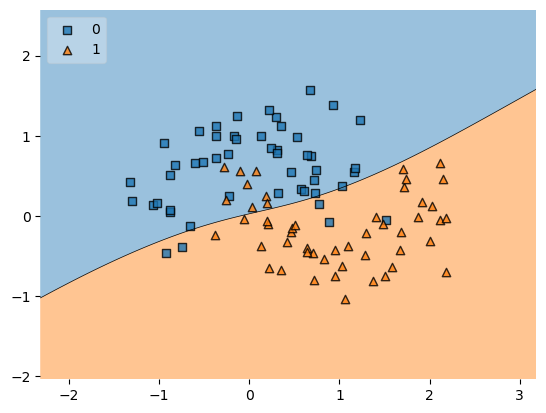

In [77]:
model2 =Sequential()

model2.add(Dense(10,activation='tanh', input_dim=2))
model2.add(Dense(10,activation='tanh'))
model2.add(Dense(10,activation='tanh'))
model2.add(Dense(10,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()
model2.get_weights()
initial_weights= model2.get_weights()
initial_weights[0]=np.random.randn(model2.get_weights()[0].shape[0],model2.get_weights()[0].shape[1])*np.sqrt(1/2)
initial_weights[1]=np.zeros(model2.get_weights()[1].shape)
initial_weights[2]=np.random.randn(model2.get_weights()[2].shape[0],model2.get_weights()[2].shape[1])*np.sqrt(1/10)
initial_weights[3]=np.zeros(model2.get_weights()[3].shape)
initial_weights[4]=np.random.randn(model2.get_weights()[4].shape[0],model2.get_weights()[4].shape[1])*np.sqrt(1/10)
initial_weights[5]=np.zeros(model2.get_weights()[5].shape)
initial_weights[6]=np.random.randn(model2.get_weights()[6].shape[0],model2.get_weights()[6].shape[1])*np.sqrt(1/10)
initial_weights[7]=np.zeros(model2.get_weights()[7].shape)
initial_weights[8]=np.random.randn(model2.get_weights()[8].shape[0],model2.get_weights()[8].shape[1])*np.sqrt(1/10)
initial_weights[9]=np.zeros(model2.get_weights()[9].shape)
model2.set_weights(initial_weights)
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
histroy = model2.fit(X,y, epochs=100, validation_split=0.2)
model2.get_weights()
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5826 - loss: 0.6921 - val_accuracy: 0.7500 - val_loss: 0.6918
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5577 - loss: 0.6924 - val_accuracy: 0.7500 - val_loss: 0.6906
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5914 - loss: 0.6908 - val_accuracy: 0.7500 - val_loss: 0.6890
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5787 - loss: 0.6905 - val_accuracy: 0.7500 - val_loss: 0.6874
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5802 - loss: 0.6887 - val_accuracy: 0.7000 - val_loss: 0.6859
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5529 - loss: 0.6878 - val_accuracy: 0.7000 - val_loss: 0.6844
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5465 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.6829
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4954 - loss: 0.6859 - val_accuracy: 0.5000 - val_loss:

<Axes: >

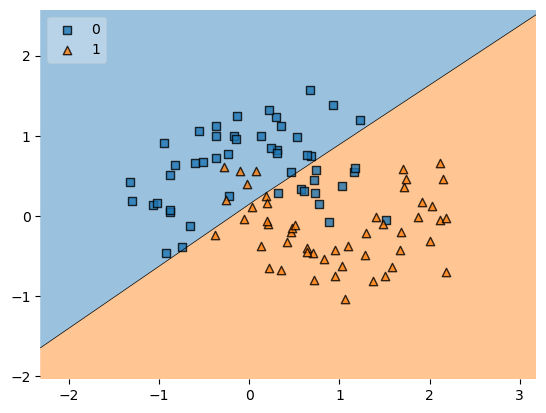

In [78]:
model1 =Sequential()

model1.add(Dense(2,activation='relu', input_dim=2, kernel_initializer='he_normal'))
model1.add(Dense(2,activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(2,activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(2,activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
model1.get_weights()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
histroy = model1.fit(X,y, epochs=100, validation_split=0.2)
model1.get_weights()
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)
